In [1]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 공통 모듈 임포트
import numpy as np
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# 6.1 결정 트리 학습과 시각화


In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # 꽃잎 길이와 너비
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

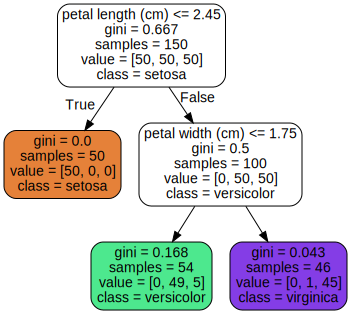

In [3]:
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file=os.path.join(IMAGES_PATH, "iris_tree.dot"),
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )


Source.from_file(os.path.join(IMAGES_PATH, "iris_tree.dot"))

# 6.2 예측하기

In [4]:
#검사 후 1-> 좌측 0-> 우측
#분류할게 없으면 leaf노드 로서 추가적인 검사 X
#samples --> 훈련샘플 몇개가 적용되었는지
#value --> 노드에서 각 클래스에 몇개의 훈련샘플이 있는지 
#gini --> 지니불순도

In [5]:
#지니불순도 : 모든 샘플이 같은 클래스에 있으면 불순도 0

# 6.3 클래스 확률 추정

In [6]:
tree_clf.predict_proba([[5,1.5]])


array([[0.        , 0.90740741, 0.09259259]])

In [7]:
tree_clf.predict([[5,1.5]])

array([1])

# 6.4 CART 훈련 알고리즘

In [8]:
#각 노드의 샘플수에 비례한 불순도 합을 계산해 가장 잘 나눌 수 있는 특성k와 그에 해당하는 임계값 tk를 구함
#최적의 트리를 찾는것은 np-complete문제로서 거의 불가능. 
#따라서 납득할만한 답을 찾는 greedy algorithm방식으로 위에서부터 찾아나감.

# 6.5 계산 복잡도

In [9]:
#완전균형트리에서 깊이d에서 리프수는 2^d
#리프노드가 훈련데이터만큼 있다면  == 훈련데이터 m에서 트리의 깊이는 log2(m)
#복잡도는 특성수와 무관하게 O(log2(m))

#하지만 훈련알고리즘은 각 노드에서 모든 훈련샘플 m의 모든 특성 n을 비교함.
#따라서 O(n*mlog2m)임.
#훈련세트가 크면 학습은 속도가 느림

# 6.6 지니불순도 또는 엔트로피

In [10]:
#대부분 비슷한 트리를 만들어내지만 지니가 계산이 좀더 빠름.
#하지만 트리가 달라졌을때, 지니는 한쪽으로 빈도높은 클래스를 고립시킴
#엔트로피는 조금더 균형잡힌 트리를 만들어냄.



# 6.7 규제 매개변수

In [11]:
#DecisionTreeClassifier
#min_samples_split(분할되기위한 노드의 최소샘플수)
#min_samples_leaf(리프가 되기위한 최고 샘플수)
#min_weight_fraction_leaf(min_samples_leaf와 같지만 가중치가 부여된 전체 샘플 수에서의 비율)
#max_leaf_node(최대 리프노드수)
#max_features(노드에서 분할에 사용할 특성 최대 수)


In [12]:
#규제없이 만든 후 카이스퀘어 검증을 통하여 불필요한 노드를 가지치기(pruning)하는 방법도 있음

# 6.8 회귀

In [13]:
from sklearn.tree import DecisionTreeRegressor

In [14]:
# 2차식으로 만든 데이터셋 + 잡음
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

In [15]:
tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X,y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [16]:
export_graphviz(
        tree_reg,
        out_file=os.path.join(IMAGES_PATH, "regression_tree.dot"),
        feature_names=["x1"],
        rounded=True,
        filled=True
    )

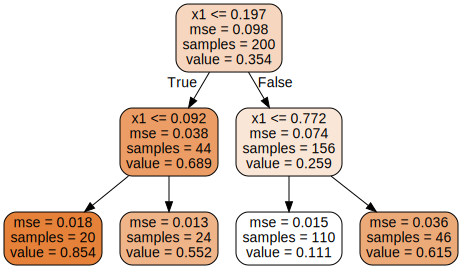

In [17]:
Source.from_file(os.path.join(IMAGES_PATH, "regression_tree.dot"))

# 6.9 불안정성

In [18]:
#훈련세트의 작은 회전에도 민감함.
#훈련데이터의 작은 변화에도 민감함.데이터 하나없앴다고 경계가 확 바뀜
#매번 확률적으로 변함. 따라서 랜덤포레스트를 통해 확률적으로 평균을 구하는방법이 좋음


# 연습문제 7

#### 문제: moons 데이터셋에 결정 트리를 훈련시키고 세밀하게 튜닝해보세요.

#### a. make_moons(n_samples=1000, noise=0.4)를 사용해 데이터셋을 생성합니다

In [19]:
from sklearn.datasets import make_moons

X,y =make_moons(n_samples=10000,noise=0.4,random_state=42)


#### b. 이를 train_test_split()을 사용해 훈련 세트와 테스트 세트로 나눕니다

In [20]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

#### c. DecisionTreeClassifier의 최적의 매개변수를 찾기 위해 교차 검증과 함께 그리드 탐색을 수행합니다(GridSearchCV를 사용하면 됩니다). 힌트: 여러 가지 max_leaf_nodes 값을 시도해보세요.

In [21]:
from sklearn.model_selection import GridSearchCV
params = {"max_leaf_nodes":list(range(2,100)),
         "min_samples_split":[2,3,4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42),
                             params,verbose=1,cv=3)

grid_search_cv.fit(X_train,y_train)


Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 882 out of 882 | elapsed:    5.6s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,


In [22]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=17,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

#### d. 찾은 매개변수를 사용해 전체 훈련 세트에 대해 모델을 훈련시키고 테스트 세트에서 성능을 측정합니다. 대략 85~87%의 정확도가 나올 것입니다.

In [23]:
from sklearn.metrics import accuracy_score

y_pred = grid_search_cv.predict(X_test)
accuracy_score(y_test,y_pred)

0.8695

# 연습문제8

#### 문제: 랜덤 포레스트를 만들어보세요.
a. 이전 연습문제에 이어서, 훈련 세트의 서브셋을 1,000개 생성합니다. 각각은 무작위로 선택된 100개의 샘플을 담고 있습니다. 힌트: 사이킷런의 ShuffleSplit을 사용할 수 있습니다.

In [24]:
from sklearn.model_selection import ShuffleSplit


n_trees = 1000
n_instances = 100
#랜덤 100개짜리 서브셋 1000개

mini_sets = []

rs = ShuffleSplit(n_splits=n_trees,test_size=len(X_train)-n_instances,random_state=42)

for mini_train_index, mini_test_index in rs.split(X_train):
    X_mini_train = X_train[mini_train_index]
    y_mini_train = y_train[mini_train_index]
    mini_sets.append((X_mini_train,y_mini_train))



#### b. 앞에서 찾은 최적의 매개변수를 사용해 각 서브셋에 결정 트리를 훈련시킵니다. 테스트 세트로 이 1,000개의 결정 트리를 평가합니다. 더 작은 데이터셋에서 훈련되었기 때문에 이 결정 트리는 앞서 만든 결정 트리보다 성능이 떨어져 약 80%의 정확도를 냅니다.

In [25]:
from sklearn.base import clone


forest = [clone(grid_search_cv.best_estimator_) for _ in range(n_trees)]

print(len(forest))
# 포레스트= 1000개의 최적 파라미터 트리모델을 가진 리스트

accuracy_scores = []

for tree, (X_mini_train, y_mini_train) in zip(forest, mini_sets):
    
    tree.fit(X_mini_train, y_mini_train)
    
    y_pred = tree.predict(X_test)
   
    accuracy_scores.append(accuracy_score(y_test, y_pred))

np.mean(accuracy_scores)

1000


0.8054499999999999

#### c. 이제 마술을 부릴 차례입니다. 각 테스트 세트 샘플에 대해 1,000개의 결정 트리 예측을 만들고 다수로 나온 예측만 취합니다(사이파이의 mode() 함수를 사용할 수 있습니다). 그러면 테스트 세트에 대한 _다수결 예측_이 만들어집니다.

In [26]:
Y_pred = np.empty([n_trees, len(X_test)], dtype=np.uint8)

for tree_index, tree in enumerate(forest):
    Y_pred[tree_index] = tree.predict(X_test)


In [31]:
Y_pred.shape

(1000, 2000)

In [33]:
from scipy.stats import mode

y_pred_majority_votes, n_votes = mode(Y_pred, axis=0)



In [37]:
print(y_pred_majority_votes)
print(y_pred_majority_votes.shape)
print(y_pred_majority_votes.reshape([-1]).shape)

[[1 1 0 ... 0 0 0]]
(1, 2000)
(2000,)


#### d. 테스트 세트에서 이 예측을 평가합니다. 앞서 만든 모델보다 조금 높은(약 0.5~1.5% 정도) 정확도를 얻게 될 것입니다. 축하합니다. 랜덤 포레스트 분류기를 훈련시켰습니다!


In [38]:
accuracy_score(y_test,y_pred_majority_votes.reshape([-1]))

0.872